<a href="https://colab.research.google.com/github/SawsanYusuf/Campus-Recruitment/blob/main/Campus_Recruitment_(1)_A_Classification_Problem_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+3"><strong>Campus Recruitment (1): A Classification Problem with Logistic Regression</strong></font>

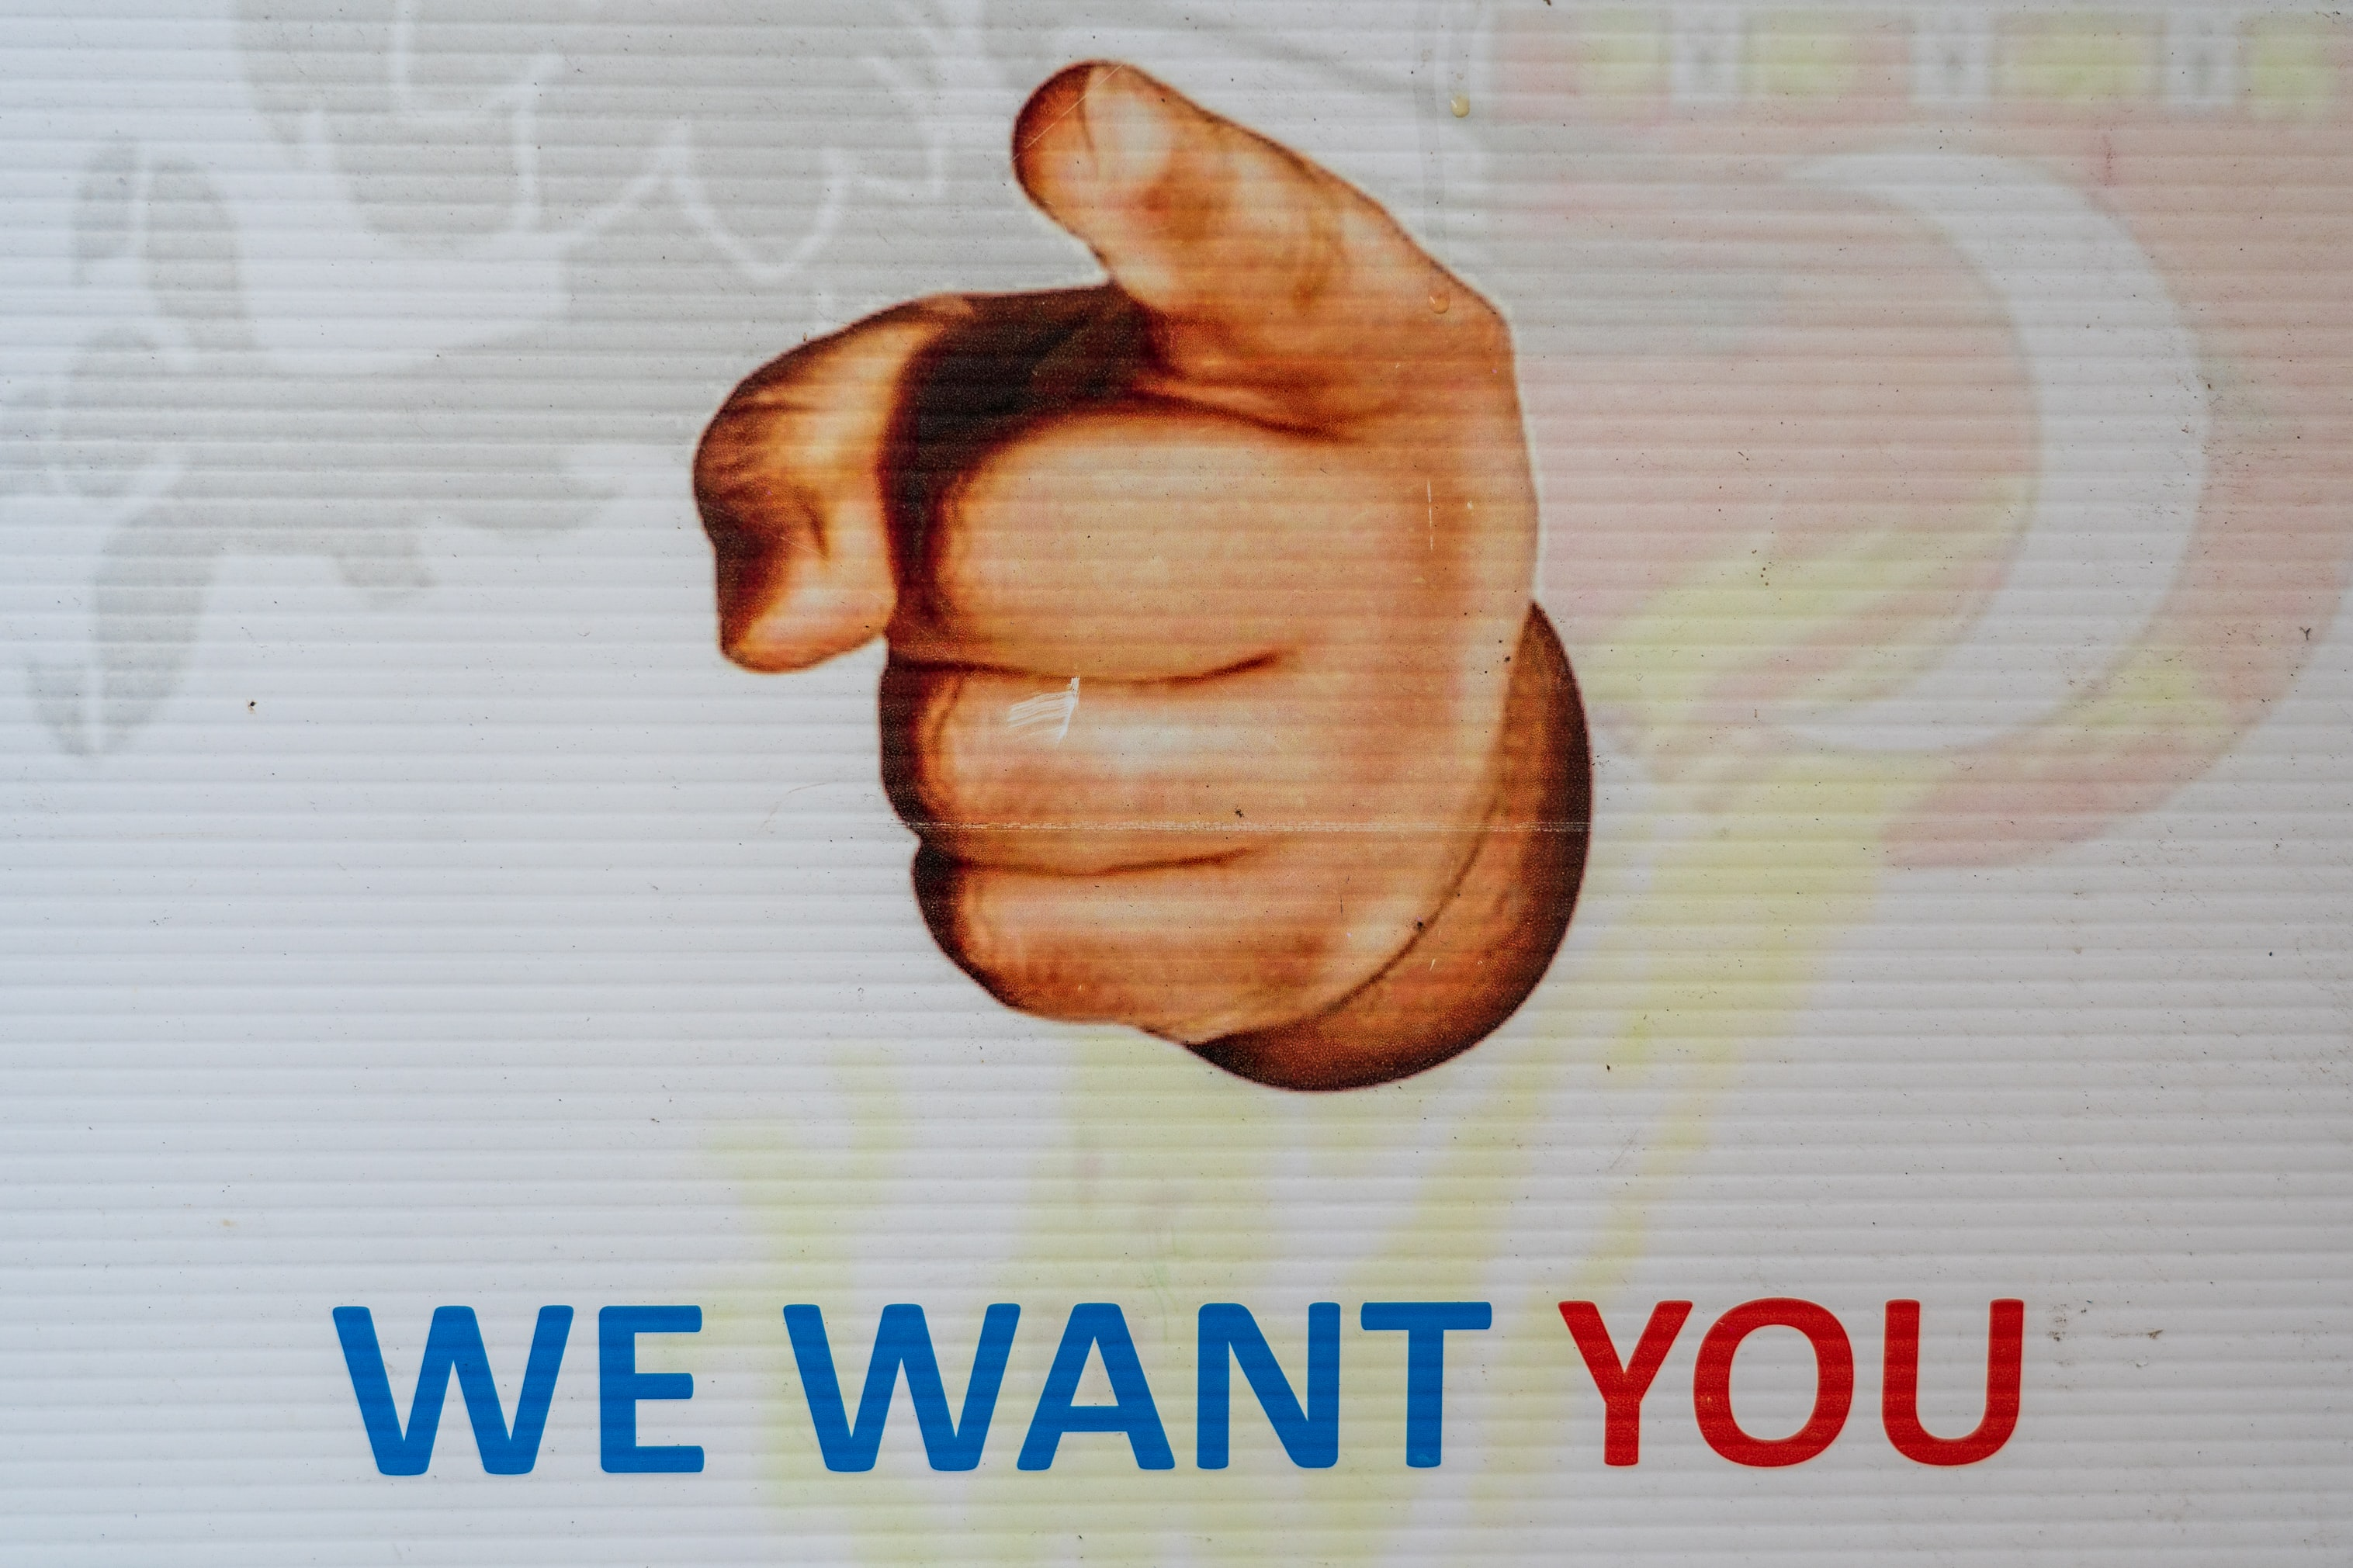

# **Introduction**

In this project, we will be focusing on data from India. And our goal is to create a predictive model so that when we give the characteristics of a candidate, the model can predict whether they will recruit.

The [dataset](https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement) revolves around the placement season of a Business School in India. The dataset has various factors on candidates, such as work experience, exam percentage, etc. Finally, it contains the status of recruitment and remuneration details.

Campus recruitment is a strategy for sourcing, engaging, and hiring young talent for internship and entry-level positions. It often involves working with university career services centers and attending career fairs to meet in person with college students and recent graduates.

In this article, we will import that dataset, clean it, and then prepare it to build a Logistic Regression model. Our goals here are the following:

First, We're going to prepare our data set for binary classification. Now, what do I mean? When we try to predict a continuous value, like the price of an apartment, it can be any number between zero and many million dollars. We call it a regression problem.

But in this project, things are a little bit different. Instead of predicting a continuous value, we have discrete groups or classes we're trying to predict between them. So this is called a Classification problem, and because in our project, we will have only two groups that we're trying to choose between, that makes it a binary classification.

The second goal is to create a logistic regression model to predict recruitment. And our third goal is to explain our model's predictions using the odds ratio.

Now in terms of the machine learning workflow, the steps we will follow, and some of the new things, we will learn along the way. So in the import phase, we will prepare our data to work with a binary target. In the exploration phase, We will be looking at the class balance. So basically, what proportion of candidates was hird, and what proportions weren't? And in the features encoding phase, we will do encoding to our categorical features. In the split part, we will do a randomized train test split. 

For the model-building phase, firstly, we will set our baseline, and because we will use accuracy scores, we'll talk more about what an accuracy score is and how to build a baseline when that's the metric we're interested in. Secondly, we will be doing logistic regression. And then last but not least, we will have the evaluation phase. We will again focus on the accuracy score. Finally, to communicate results, we will look at the odds ratio. 


Lastly, Before diving into the work, let's introduce ourselves to the libraries we will use throw the project. First, we will use the io library to import our data to Google Colabe notebook. Then, as we'll use a logistic regression model, we'll import that from scikit-learn. After that, also from scikit-learn, we will import our performance metrics, the accuracy score, and the train-test-split.

We will use Matplotlib and Seaborn for our visualization, and NumPy will be just for little math. We need Pandas to manipulate our data, LabelEncoder to encode our categorical variables, and StandardScaler to normalize the data. That'll be the libraries that we need. Let's jump into preparing the data. 


In [ ]:
#import libraries
import io
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.simplefilter(action="ignore", category=FutureWarning)

# **1. Prepare Data** 

## **1.1. Import** 

To start our preparing the data, let's get our important work. First, we load our data file, and then we need to put them into a DataFrame `df`.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Read CSV file
df = pd.read_csv(io.BytesIO(uploaded["Placement_Data_Full_Class.csv"]))
print(df.shape)
df.head()

(215, 15)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


We can see our beautiful DataFrame, and we have 215 records and 15 columns that include the `status` attribute, our target. This is the description for all features.

Feature | Description
---------|-------------------------------
sl_no | Serial Number
gender |Gender - Male='M', Female='F'
ssc_p |Secondary Education percentage- 10th Grade
ssc_b |Board of Education - Central/ Others
hsc_p |Higher Secondary Education percentage - 12th Grade
hsc_b |Board of Education - Central/ Others
hsc_s |Specialization in Higher Secondary Education
degree_p| Degree Percentage
degree_t |Under Graduation(Degree type) - Field of degree education
workex| Work Experience
etest_p | Employability test percentage (conducted by college)
specialisation | Post Graduation(MBA) - Specialization
mba_p |MBA percentage
status |Status of placement - Placed/Not placed
salary |Salary offered by corporate to candidates

## **1.2. Explore**

Now we have all these features which we are going to explore. So let's start our exploratory data analysis. First, let's take a look at the info for this dataframe and see if any of them we may need to keep or if we maybe need to drop.


Our concern for this is, are there any leaky features that would give our model information that it wouldn't have if it were deployed in the real world? Remember that we want our model to predict whether a candidate is going to place or not, and we want our model to make those predictions before the recruitment happens. So we don't want to give any information about these candidates after the recruitment. That would be giving it information in training that it wouldn't have during deployment. 


In [ ]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Now when we look at `df` info, there are a couple of things that we're looking for, we have 215 rows in our dataframe, and the question we want to ask ourselves is, is there any missing data? And if we look here, it seems we don't have missing data except for the salary column, as expected, since those who didn't get hired. 

Another concern for us here is, are there any leaky features that would give our model information that it wouldn't have if it deployed in the real world? Remember that we want our model to predict whether a candidate is going to place or not, and we want our model to make those predictions before the recruitment happens. So we don't want to give any information about these candidates after the recruitment. That would be giving it information in training that it wouldn't have during deployment.

So, it's pretty clear that this `salary` feature gives information about the salary offered by the corporate. And because this salary is for those accepted, this feature here constitutes leakage, and we have to drop it.


In [ ]:
df.drop(columns="salary", inplace=True)

The second thing that I want to look at is the data types for these different features. So, looking at these data types, we have eight categorical features with our target and seven numerical features, and everything is correct. So now that we have these ideas, let's take some time to explore a little bit more deeply.

We know that our target is comprised of two groups. We have candidates that were placed and candidates who were not. The question is, what is the relative proportion of those two classes? Are they about the same balance doors, one a lot more than the other? That's something that you need to take a look at when you're doing classification problems. So this is an important step in our EDA.


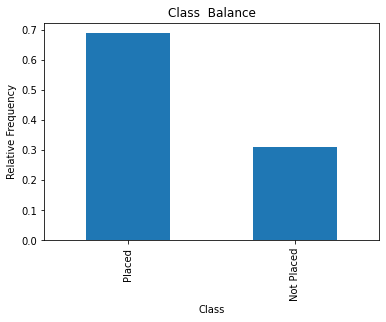

In [ ]:
# Plot class balance
df["status"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class  Balance"
);

Our positive class `1` counts for more than 65% of our observations, and our negative class `0` is around 30%. Now, if these were super imbalanced, like, if it were more like 80 or even more than that, I would say these are imbalanced classes. And we'd have to do some work to make sure our model is going to function in the right way. But this is an okay balance. 

Let's do a bit of manipulation and then make another visualization to see if we can notice some connection between our features and the target. Let's start with the numerical features.


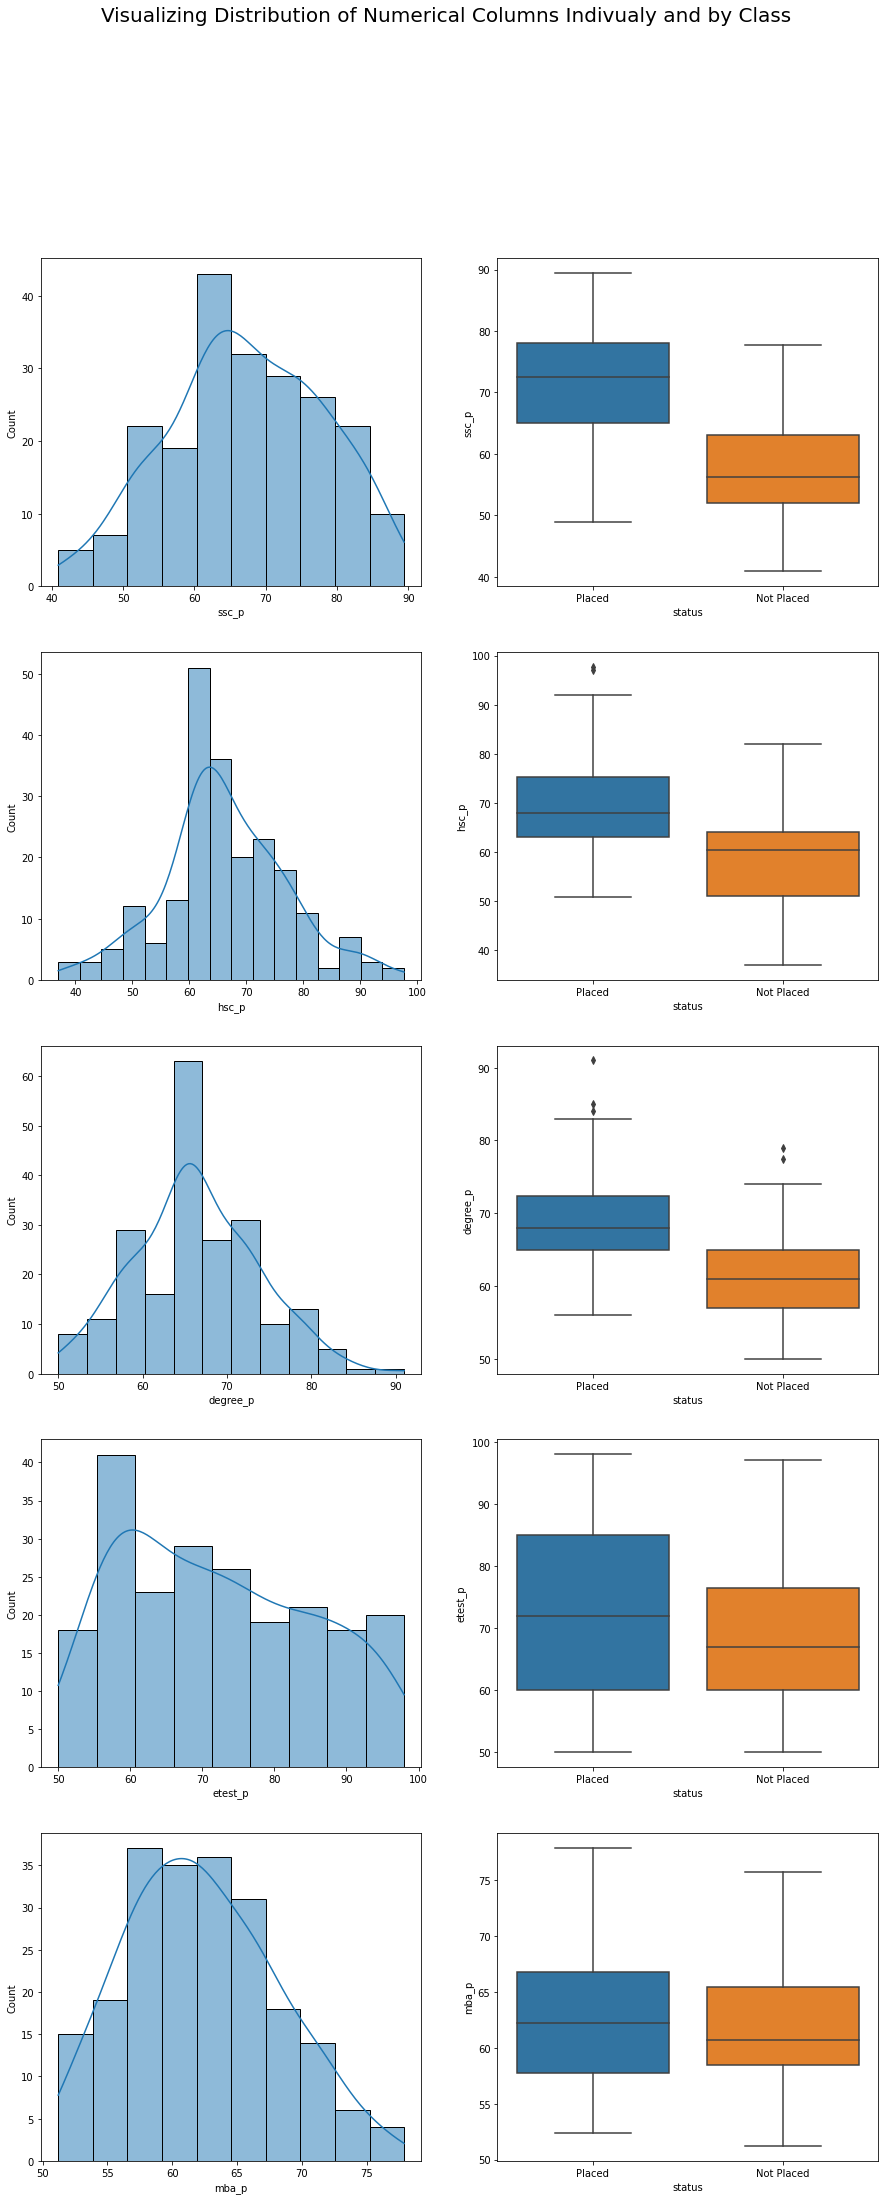

In [ ]:
fig,ax=plt.subplots(5,2,figsize=(15,35))
for index,i in enumerate(df.select_dtypes("number").drop(columns="sl_no")):
    plt.suptitle("Visualizing Distribution of Numerical Columns Indivualy and by Class",size=20)
    sns.histplot(data=df, x=i, kde=True, ax=ax[index,0])
    sns.boxplot(data=df, x='status', y=i, ax=ax[index,1]);

By looking at the individual distribution of our numerical features, we can see that all the distributions follow a normal distribution, and most of the candidate's educational performances are between 60-80%.

In the second column from our graph, we see that we have a double box plot with `placed` class on the right and then `not placed` class on the left. For `etest_p` and `mba_p` features, there's not a lot of difference in these two distributions from a model-building perspective. There is a significant overlap in the distribution over the classes, so these features would not be a good predictor of our target. As for the rest of the features, there are distinct enough to take them as potential good predictors of our target. Let's move on to the categorical features. 

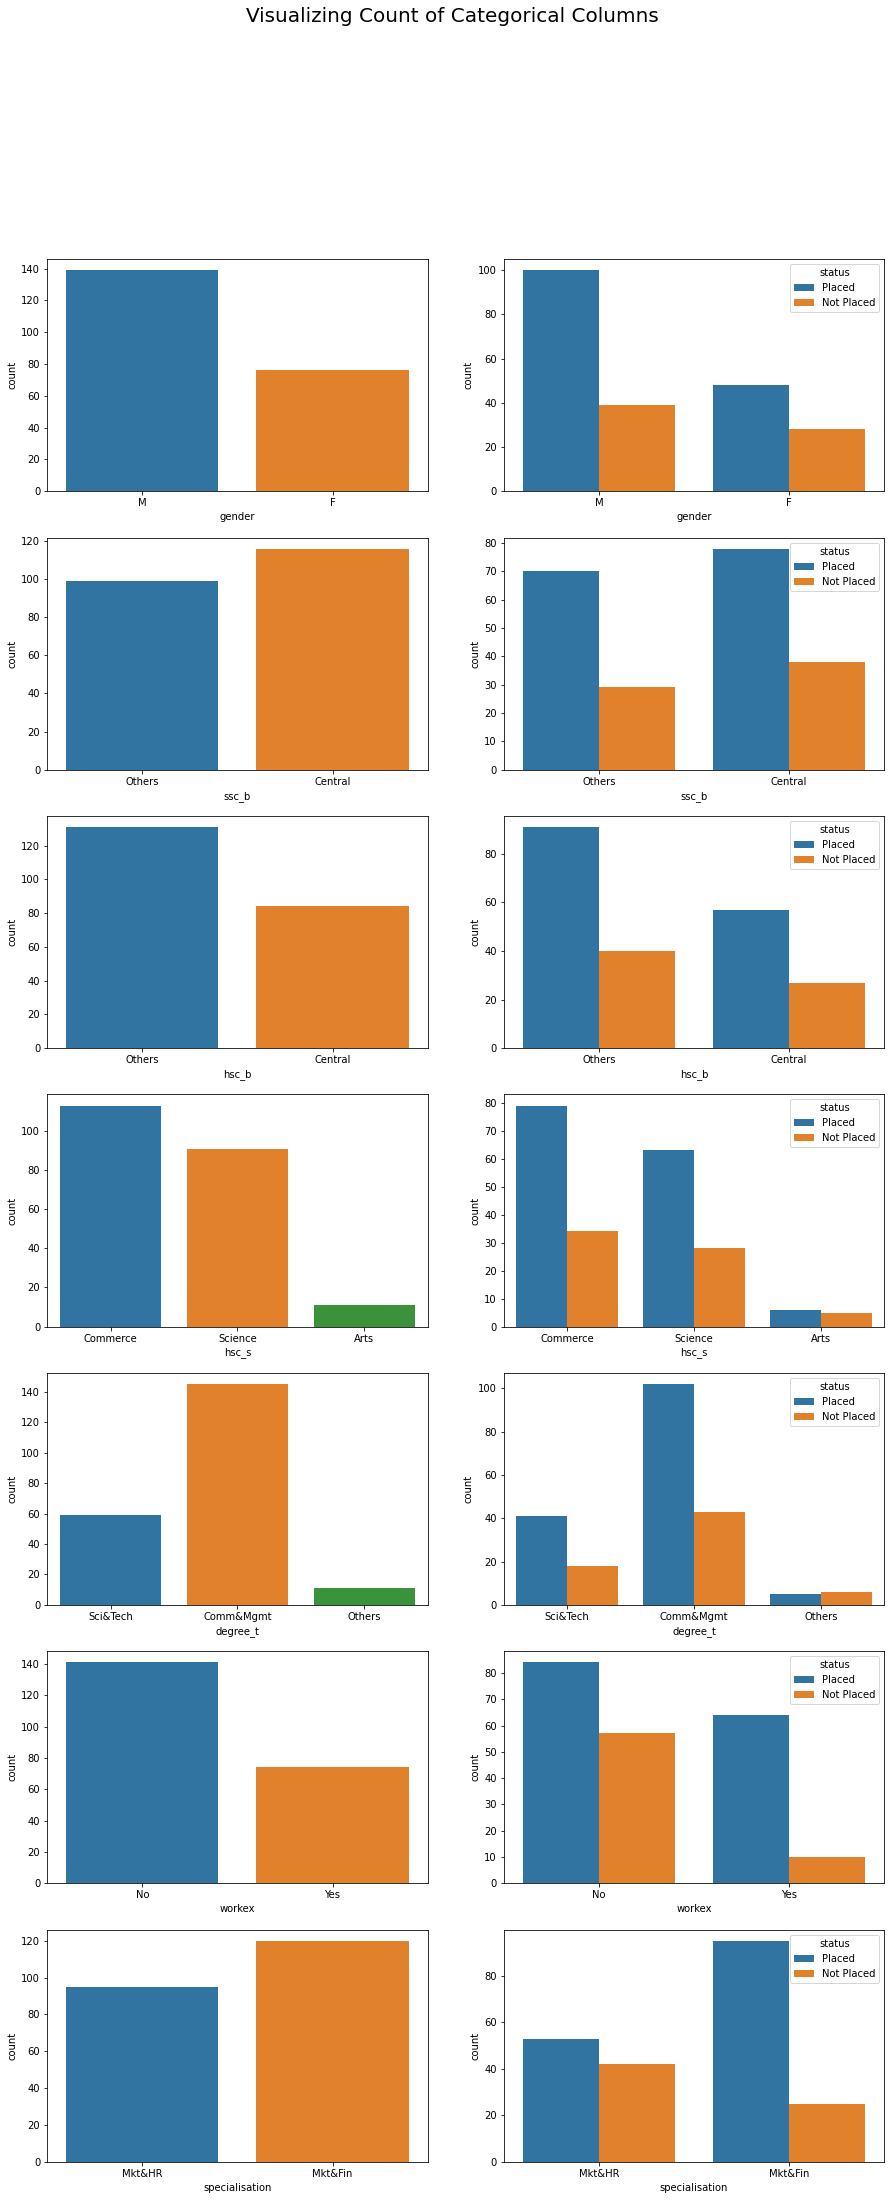

In [ ]:
fig,ax=plt.subplots(7,2,figsize=(15,35))
for index,i in enumerate(df.select_dtypes("object").drop(columns="status")):
    plt.suptitle("Visualizing Count of Categorical Columns",size=20)
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue="status")

By looking at the distribution of our categorical features, we see that we have more male candidates than females. And most of our candidates don't have any work experience, but these candidates got hired more than the ones who had. We have candidates who did commerce as their `hsc` course, and as well as an undergrad, the candidates with a science background are the second highest in both cases. 

Okay, so we have done a lot of exploration, and there's just one last thing I want to do. A little note on logistic regression models, they are for classification, but they're in the same group as other linear models like linear regression, and for that reason, since they're both linear models. We also need to worry about the issue of multicollinearity when we're working with a logistic regression model. 

So, we need to create a correlation matrix, and then we need to plot it out in a heatmap. We don't want to look at all the features here, we want to look just at the numerical features, and we don't want to include our target, which it's a good thing if our target is correlated with some of our features.

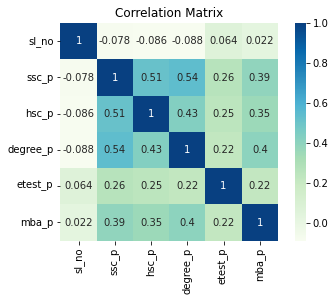

In [ ]:
corr = df.select_dtypes("number").corr()
# Plot heatmap of `correlation`
plt.title('Correlation Matrix')
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='GnBu');

Here are the light blue, which means little to no correlation, and the dark blue, with which we have a higher correlation. So we want to be on the lookout for those dark blue. We can see a dark blue line, a diagonal line going down the middle of this plot. Those are the features that are correlated with themselves. And then, we see some dark squares. That means we have a bunch of correlations between our features.


All right, we're almost done with our exploration, but there's one more thing we need to do, we need to check for high and low cardinality categorical variable variables.

In [ ]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

gender            2
ssc_b             2
hsc_b             2
hsc_s             3
degree_t          3
workex            2
specialisation    2
status            2
dtype: int64

I don't see any columns where the number of unique values is one or anything super high. But I think there's one categorical type column that we're missing here. And the reason is that it's not encoded as an object but as an integer.

The `sl_no` column isn't an integer in the sense we know. These candidates are ranked in some order. Just a unique name tag and the name is like a category, right? So this is a categorical variable. And it doesn't have any information, so we need to drop it. 

In [ ]:
df.drop(columns="sl_no", inplace=True)

## **1.3 Featuers Encoding** 

We finished our analysis, and the next thing we need to do is encode our categorical features, I will use the `LabelEncoder`. Label Encoding is a popular encoding technique for handling categorical variables. With using this technique, each label is assigned a unique integer based on alphabetical ordering.

In [ ]:
lb = LabelEncoder ()

cat_data = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for i in cat_data:
    df[i] = lb.fit_transform(df[i])

df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


## **1.4. Split**

All right, the last step in our data preparation, we've imported and cleaned our data. We've done a bit of exploratory data analysis, and now we need to split our data. We have two types of split: vertical split or features-target and horizontal split or train-test sets. Let's start with the vertical one.

In [ ]:
target = "status"
X = df.drop(columns = target)
y = df[target]

Models generally perform better when they have normalized data to train with, so what is normalization? Normalization is transforming the values of several variables into a similar range. Our target is to normalize our variables. So their value ranges will be from 0 to 1. Let's do that.


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Now let's do the horizontal split or train-test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
    )

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (172, 12)
y_train shape: (172,)
X_test shape: (43, 12)
y_test shape: (43,)


# **2. Build Model**

## **2.1. Baseline**

So now we need to begin building our model, and we'll need to start ordering to set our baseline. Remember that the type of problem we're dealing with is a classification problem, and there are different metrics to evaluate classification models. The one I want to focus on is the accuracy score.

Now, what is the accuracy score? Well, think about it this way. Let's say you're taking an exam that says the exam has a hundred questions on it, and you get 90 questions, right? What is your score on that exam? It's 90%, or if we will do it as a proportion point, 9. Well, that's what the accuracy score is. You are either right or wrong, and you take the number you got. And divide it by the number of predictions or questions you did in the exam, and that's how you get your answer. So what that means is that the accuracy score goes between 0 and 1. Zero is not good. That's where you don't want to be, and one is perfect. 

So Let's keep that in mind and remember that the baseline or naive model is a model that gives one prediction over and over again, regardless of what the observation is, only one guess for us. In our case,  we have two classes, placed or not. If we could make only one prediction, what would be our one guess? If you said the majority class. I think that makes sense, right? 

If we can only have one prediction, we should probably choose the class with the highest observations in our dataset. So, now we need to find the accuracy score for a model that always guessed the majority class.


In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.68


We can see that our baseline accuracy is 68% or 0.68 as a proportion. So to add value to be of use, we want to get above that number and get closer to one. That's our goal, and now let's start building our model. 

## **2.2. Iterate**

Now it's time to build our model. We will use logistic regression, but before we do, let's talk a little about what logistic regression is and how it works, and then we can do the coding stuff. And for that, here we have a little grid. 

Along the x-axis, let's say I have the p_degrees of candidates in our data set. And as I move from right to left, the degrees get higher and higher, and then along the Y axis, I have the possible classes for placement:  zero and one.

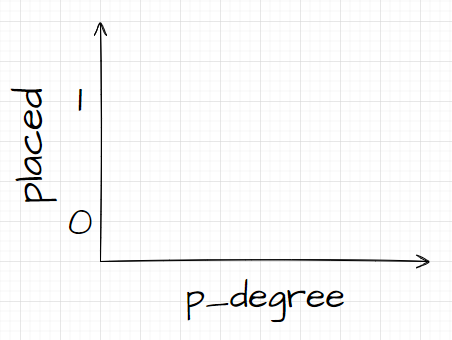

So if we were to plot out our data points, what would it look like? We know from our analysis that a high `p_degree` candidate has a higher chance of being hired. So, it would probably look something like this, where the candidate with a small `p_degree` would be down at zero. And the candidate with a high `p_degree` would be up at one.

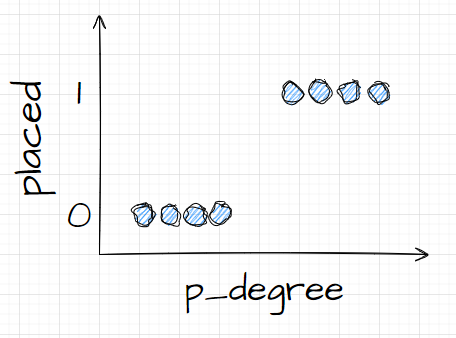

Now let's say that we wanted to do linear regression with this. Let's say we wanted to plot a line. Now, if we did that, what would happen is that line would be plotted in such a way that it would try to be as close to all the points as possible. And so we would probably end up with a line that looked something like this. Would this be a good model?

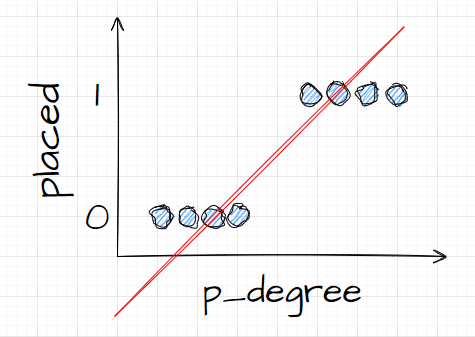

Not really. What would happen is regardless of the p_degree of the candidate, we would always get a sort of value. And that's not will help us because the numbers, in this context, don't mean anything. This classification problem needs to either be zero or one. So, it's not going to work that way.

On the other hand, because this is a line, what if we have a candidate with a very low p_degree? Well, all of a sudden, our estimate is a negative number. And again, this doesn't make any sense. There is no negative number either needs to be zero or one. And in the same way, if we have a candidate with a very high p_degree, I might have a positive, something above one. And again, that doesn't make any sense. We need to either have a zero or one. 


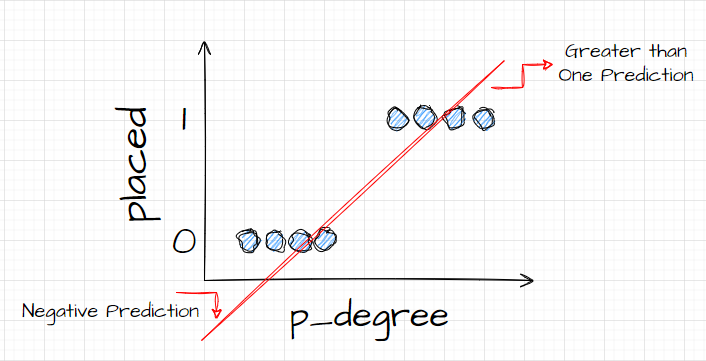

So what we see here are some serious limitations to using linear regression for classification. So what do we need to do?  We need to create a model that number one: doesn't go below zero or above one, so it needs to be bound between zero and one. And the number two, whatever comes out of that function, that equation that we create, we maybe shouldn't treat it as the prediction per se but as a step towards making our final prediction.

Now, let me unpack what I just said, and let's remind ourselves that when we're doing our linear regression models, we end up with this linear equation, Which is the simplest form. And this is that equation or function that gives us that straight line. 


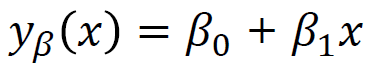

There's a way to bind that line between 0 and 1. And what we can do is take this function that we've just created and enclose it in another function, what's called a sigmoid function.

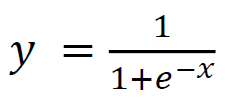

So, I'm going to take the linear equation we just had, and I'm going to shrink it down in the sigmoid function and put it as the exponential.

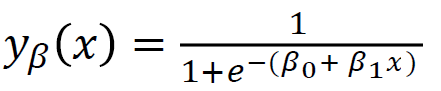

What happens is instead of getting a straight line, we get a line that looks kind of like this. It's stuck at one. It comes in and squiggles down. Then it is stuck at zero.

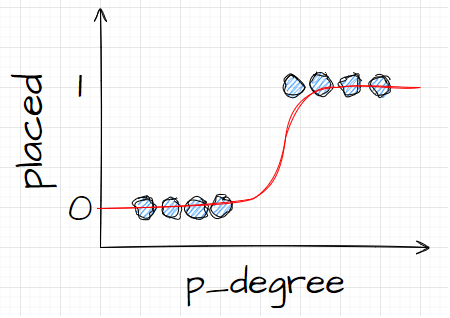

All right, that's what the line looks like, and we can see that we've solved our first problem. Whatever we get out of this function will be between 0 and 1. In the second step, we will not treat whatever comes out of this equation as the ultimate prediction. Instead, we will treat it as a probability.

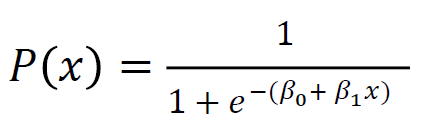

What do I mean? That means when I make a prediction, I will get some floating point value between 0 and 1. And what I will do is treat it as the probability that my prediction belongs to the positive class. 

So I get a value up at 0.9999. I will say the probability that this candidate belongs to our positive, placed class is 99%. So I'm almost sure that it belongs to the positive class. Conversely, if it's down at point 0.001 or whatever, I will say this number is low. The probability that this particular observation belongs to the positive, the placed class is almost zero. And so, I'm going to say it belongs to class zero. 

So that makes sense for numbers that are close to one or close to zero. But you might ask yourself, what do I do with other values in between? The way that works is we put a cut-off line right at 0.5, so any value I get below that line, I'll put it at zero, so my prediction is no, and if it's above that line, if it's above point five, I will put this in the positive class, my prediction is one.



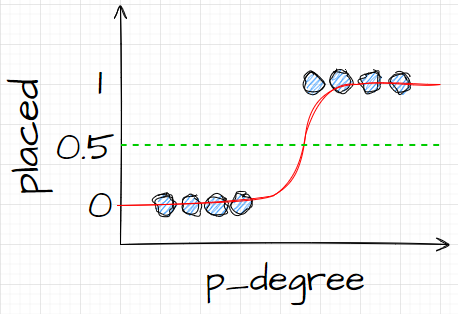


So, now I have a function that gives me a prediction between zero and one, and I treat that as a probability. And if that probability is above 0.5 or 50%, I say, okay, positive class one. And if it's below 50%, I say, that's negative class, zero. So that is the way that logistic regression works. And now that we understand that, let's code it up and fit it. I will set the hyperparameter 'max_iter' to 1000. This parameter refers to the maximum number of iterations for the solvers to converge.

In [ ]:
# Build model
model = LogisticRegression(max_iter=1000)
    
# Fit model to training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## **2.3 Evaluate**

Now it's time to see how our model does. It's time to evaluate. So, let's remember that this time, the performance metric was interested in is the accuracy score, and we want an accurate one. The accuracy score goes between 0 and 1. Zero is bad, and One is good. And we want to beat the baseline of 0.68. There are two ways to calculate the accuracy score inside `scikit-learn,` and I'll do both.

In [ ]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.9
Test Accuracy: 0.88


We can see our training accuracy at 90%. It's beating the baseline. Our test accuracy was a little lower at 88%. It also beat the baseline and was very close to our training accuracy. So that's good news because that means that our model isn't overfitting or anything. And that'll probably generalize well, So that's good news.

# **3. Results**

Remember that with logistic regression, we end up with these final predictions of zero or one. But underneath that prediction, there's a probability of a floating point number between zero or one, and sometimes it can be helpful to see what those probability estimates are. Let's look at our training predictions, and let's look at the first five.


In [ ]:
model.predict(X_train)[:5]

array([0, 1, 1, 1, 1])

So those were the final predictions, but what are the probabilities behind them? To get those, we need to do a slightly different code. And again, we'll work with our x-train observations.


In [ ]:
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.92003219 0.07996781]
 [0.03202019 0.96797981]
 [0.00678421 0.99321579]
 [0.03889446 0.96110554]
 [0.00245525 0.99754475]]


We can see a kind of nested list with two different columns in it. The column on the left represents our negative class. And the other column represents class one or the positive class. The probability that a candidate is placed. All right, so that's what those two columns represent.

I will focus on the second column. If we look at the first probability estimate right, we can see that this is 0.27. So since that's below 50%, our model says, my prediction is zero. And for the following predictions, we can see that those are all above 0.5, and that's why our model predicted one in the end.

In [ ]:
features = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p','degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']
importances = model.coef_[0]
importances

array([ 0.51564492,  2.00381614,  0.19933848,  1.03672558, -0.13140359,
       -0.03450237,  1.2186842 , -0.34811025,  0.66478374, -0.13030164,
       -0.16216474, -0.89995061])

Now we need to put the feature names and importances in a series. But there's one other thing we need to do. We need to display the feature importance as something called odds ratios. So we need to do just a little mathematical transformation. We need to take the exponential of our importances. And we should see a bunch of floating point numbers.

In [ ]:
odds_ratios = pd.Series(np.exp(importances), index= features).sort_values()
odds_ratios.head()

mba_p             0.406590
degree_t          0.706021
specialisation    0.850301
hsc_b             0.876864
etest_p           0.877831
dtype: float64

Before we talk about the odds ratios and what they are, let's get them on a horizontal bar chart. Let's use pandas to plot, and remember that we will look for the five largest coefficients. And we don't want to use all the odds ratios. So we want to use the tail. 

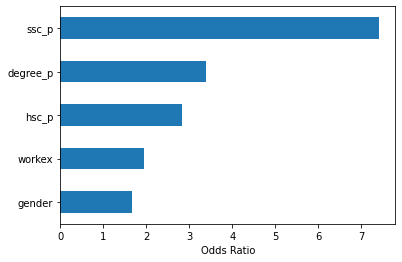

In [ ]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind="barh")
plt.xlabel("Odds Ratio");

Now I want you to imagine a vertical line right at 5, and I want to start by looking at it. Let's talk about each of these individually or just the first couple. So let's start here with the `ssc_p` which refers to the `Secondary Education percentage - 10th Grade`. And we can see that the odds ratio is at 30. Now, what does that mean? It means if a candidate has a high `ssc_p` the odds of their placement are six times greater than other candidates, all things being equal. So another way to think of it is when the candidate has `ssc_p` the chance of the candidate's recruitment increases six times. 


So any odds ratio over five increases the odds that candidates are placed. And so that's why we have that vertical line at five. And these five kinds of features are characteristics that are most associated with an increase in recruitment. So, that's what our odds ratio is. Now, we've looked at the features that are most associated with an increase in recruitment. Let's look at the features that are associated with it, the decrease in recruitment. So now it's time to look at the smallest ones. So instead of looking at the tail, we will look at the head.

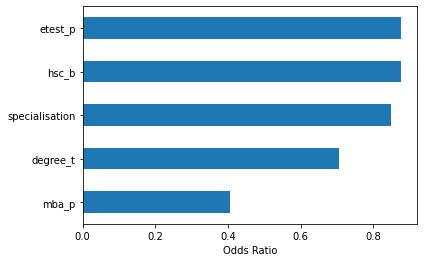

In [ ]:
odds_ratios.head().plot(kind="barh")
plt.xlabel("Odds Ratio");

The first thing we need to see here is that notice on the x-axis everything is one or below. Now, what does that mean? So let's take a look at our smallest odds ratio here. It's mba_p which refers to the MBA percentage. We can see that it's ready at about 0.45. Now, what does that mean? Well, the difference between 0.45 and 1 is 0.55. All right? And what does that number mean? Those Candidates with MBA are less likely to be recruited by 55%, All other things being equal. All right? So it decreased the odds of recruitment by a factor of 0.55 or 55%. And that's true for everything here.


# **Conclusion**

So what did we learn? First, in the prepared data phase, we learned that we are working with classification, specifically binary classification. In terms of exploring the data, we did a ton of stuff, but in terms of highlights, we looked at class balance, right? The proportion of our positive and negative classes. Then we split our data. 

Since this is a classification model, we learned about a new performance metric, the accuracy score. Now, the accuracy score goes between 0 and 1. Zero is bad, and one is good. When we were iterating, we learned about logistic regression. That's a magical way, where you can take a linear equation, a straight line, and put it inside another function, a sigmoid function, and an activation function, and get a probability estimate out of it and turn that probability estimate into a prediction. 

Then with evaluation, we saw that our accuracy beat the baseline. So that was a piece of good news. Finally, when we learned about the odds ratio and the way we can interpret the coefficients in our logistic regression model to see whether a given feature will increase the odds that we have recruited a candidate or decrease those odds. 

So, a whole bunch of stuff that we learned. I'm super proud of you. 

Thank you and take care.

LinkedIn: https://www.linkedin.com/in/sawsan-yusuf-027b2b214